In [2]:
import cv2
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils


# For webcam input:
cap = cv2.VideoCapture(0)
with mp_face_detection.FaceDetection(
    model_selection=0, min_detection_confidence=0.5) as face_detection:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_detection.process(image)

    # Draw the face detection annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.detections:
      for detection in results.detections:
        mp_drawing.draw_detection(image, detection)
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Face Detection', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()

KeyboardInterrupt: 

In [3]:
import cv2
import numpy as np
import mediapipe as mp
import time
import os

# Подключаем камеру
cap = cv2.VideoCapture(0)
cap.set(3, 640) # Width
cap.set(4, 480) # Lenght
cap.set(10, 100) # Brightness

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

pTime = 0
cTime = 0

#Зацикливаем получение кадров от камеры
while True:
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        ret, frame = cap.read()
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        # Recolor image back to BGR for rendering
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        

        cTime = time.time()
        fps = 1/(cTime-pTime)
        pTime = cTime
        cv2.putText(image, str(int(fps)),(10,30), cv2.FONT_HERSHEY_PLAIN, 2, (255,0,0), 2) # ФреймРейт

        cv2.imshow('python', image)
        
    if cv2.waitKey(1) == 27: # exit on ESC
        break
        
cv2.destroyWindow("python")
cap.release()
cv2.waitKey(1)

KeyboardInterrupt: 

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
 
mp_facemesh = mp.solutions.face_mesh
mp_drawing  = mp.solutions.drawing_utils
denormalize_coordinates = mp_drawing._normalized_to_pixel_coordinates
 
%matplotlib inline

In [8]:
image = cv2.imread("test.jpg")

In [9]:
# Running inference using static_image_mode 
with mp_facemesh.FaceMesh(
    static_image_mode=True,         # Default=False
    max_num_faces=1,                # Default=1
    refine_landmarks=False,         # Default=False
    min_detection_confidence=0.5,   # Default=0.5
    min_tracking_confidence= 0.5,   # Default=0.5
) as face_mesh:
     
    results = face_mesh.process(image)
 
# Indicates whether any detections are available or not.
print(bool(results.multi_face_landmarks))

True


c:\Users\n1cko\anaconda3\envs\work\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


c:\Users\n1cko\anaconda3\envs\work\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


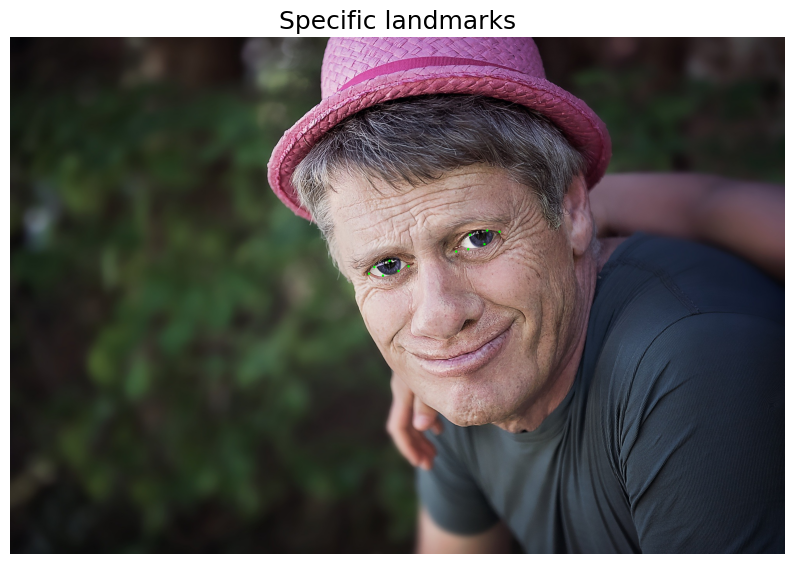

In [57]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Инициализация mediapipe face mesh и drawing utilities
mp_drawing = mp.solutions.drawing_utils
mp_facemesh = mp.solutions.face_mesh

def denormalize_coordinates(x, y, width, height):
    return int(x * width), int(y * height)

def plot_specific_landmarks(
    *,
    img_dt,
    face_landmarks,
    specific_idxs,
    lmk_circle_radius=3,
    name="1"
):
    # Для отрисовки выбранных точек
    image_with_landmarks = img_dt.copy()

    imgH, imgW, _ = img_dt.shape

    # Получение объекта, который содержит координаты x, y, и z для каждого landmark
    landmarks = face_landmarks.landmark

    # Итерация по всем landmarks
    for landmark_idx, landmark in enumerate(landmarks):
        if landmark_idx in specific_idxs:
            pred_cord = denormalize_coordinates(landmark.x, landmark.y, imgW, imgH)
            cv2.circle(image_with_landmarks, pred_cord, lmk_circle_radius, (0, 255, 0), -1)

    # Отрисовка пост-обработанных изображений
    plt.figure(figsize=(10, 10))
    plt.title("Specific landmarks", fontsize=18)
    plt.imshow(cv2.cvtColor(image_with_landmarks, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Пример использования функции
# Загрузка изображения
image_path = '3.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Инициализация MediaPipe Face Mesh
with mp_facemesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5) as face_mesh:
    # Обработка изображения с Face Mesh
    results = face_mesh.process(image_rgb)

    # Проверка, нашлись ли лица
    if results.multi_face_landmarks:
        face_landmarks = results.multi_face_landmarks[0]
        
        # Задайте здесь индексы точек, которые хотите отобразить
        eye_idxs = {
            "left": [362, 385, 387, 263, 373, 380],
            "right": [33, 160, 158, 133, 153, 144],
        }
        
        # Объединение всех индексов в один список
        specific_idxs = eye_idxs["left"] + eye_idxs["right"]
        
        # Вызов функции для отрисовки конкретных точек
        plot_specific_landmarks(
            img_dt=image,
            face_landmarks=face_landmarks,
            specific_idxs=specific_idxs
        )


In [25]:
import cv2

In [26]:
frame = cv2.imread("2.jpg")

In [28]:
 # Инициализация MediaPipe Face Mesh
face_mesh = mp.solutions.face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
)
results = face_mesh.process(frame)
results

mediapipe.python.solution_base.SolutionOutputs

In [58]:
np.array(results.multi_face_landmarks[0].landmark)[[362, 385, 387, 263, 373, 380]].x


0.5758578181266785

In [60]:
np.array(results.multi_face_landmarks[0].landmark)[[362, 385, 387, 263, 373, 380]]

AttributeError: 'numpy.ndarray' object has no attribute 'y'